#*`Assignment_5`*

**Problem Statement 1**: Write Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:

1. Create a seperate DataFrame with only numeric data by remove the "country" column
2. Scale the data using the Standard Scaler to create a scaled DataFrame
3. Plotting dendograms with the complete linkage method
4. Creating cluster labels using cut tree
5. Perform the 4-Component PCA on DataFrame
6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

In [49]:
# Make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
# Get the data
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Country-data.csv

--2024-03-08 16:01:57--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Country-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9061 (8.8K) [text/plain]
Saving to: ‘Country-data.csv’

Country-data.csv    100%[===================>]   8.85K  --.-KB/s    in 0s      

2024-03-08 16:01:57 (51.0 MB/s) - ‘Country-data.csv’ saved [9061/9061]



In [3]:
# Load the dataset
c_data = pd.read_csv('Country-data.csv')
c_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Create a seperate DataFrame with only numeric data by remove the "country" column
country_data = c_data.drop('country', axis = 1)
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Check if any null values are present
country_data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Check for duplicates
country_data.duplicated().sum()

0

In [7]:
# Scale the data using the Standard Scaler to create a scaled DataFrame
sc = StandardScaler()

# Fit the scalar on the data
country_data_scaled = pd.DataFrame(sc.fit_transform(country_data), columns = country_data.columns)
country_data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


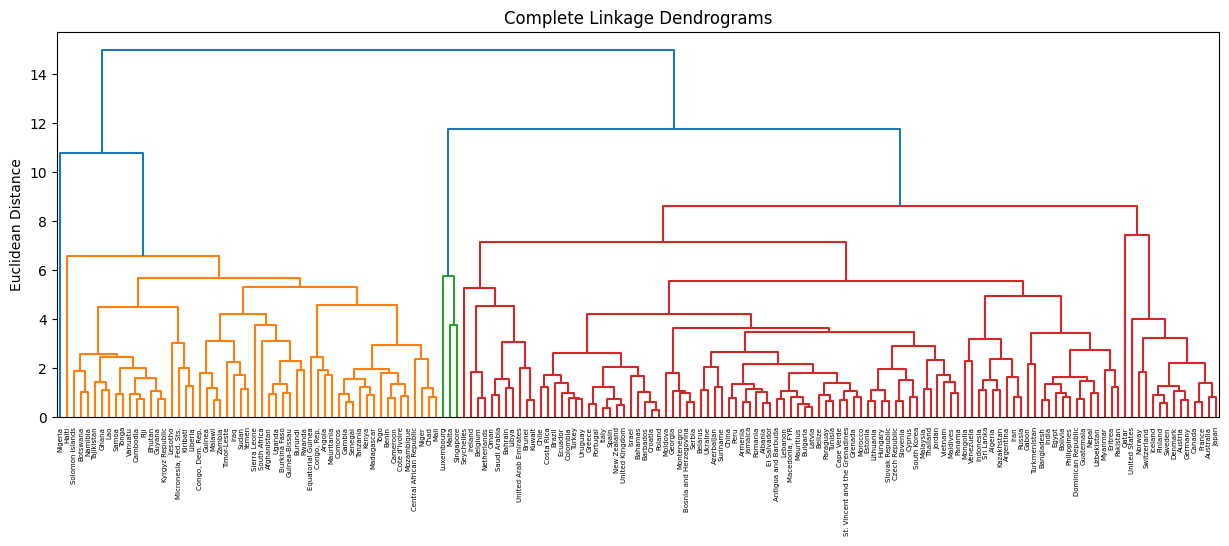

In [8]:
# Plotting dendograms with the complete linkage method
plt.figure(figsize = (15,5))
link = linkage(country_data_scaled, method = 'complete', metric = 'euclidean')
dendrogram(link, labels = c_data.country.tolist(), leaf_rotation = 90)
plt.title('Complete Linkage Dendrograms')
plt.ylabel('Euclidean Distance')
plt.show()

In [9]:
# Creating cluster labels using cut tree
country_data_scaled['hierarchical_cluster_labels'] = cut_tree(link, n_clusters = 4)
country_data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hierarchical_cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [10]:
# Perform the 4-Component PCA on DataFrame
n_components = 4
pca = PCA(n_components = n_components)

# Fit the PCA
pca.fit(country_data_scaled)

# Create a dataframe of the transformed data
pc_data = pd.DataFrame(pca.transform(country_data_scaled), columns = [f"PC{i+1}" for i in range(n_components)])
pc_data.head()

,PC1,PC2,PC3,PC4
0,-3.006985,0.123167,-0.800470,0.925003
1,0.480433,-0.599432,-0.197637,-1.202976
2,-0.208720,-0.517000,1.326123,-0.752685
3,-3.005853,1.655001,1.464063,0.995353
4,1.068704,0.135366,-0.137515,-0.863858


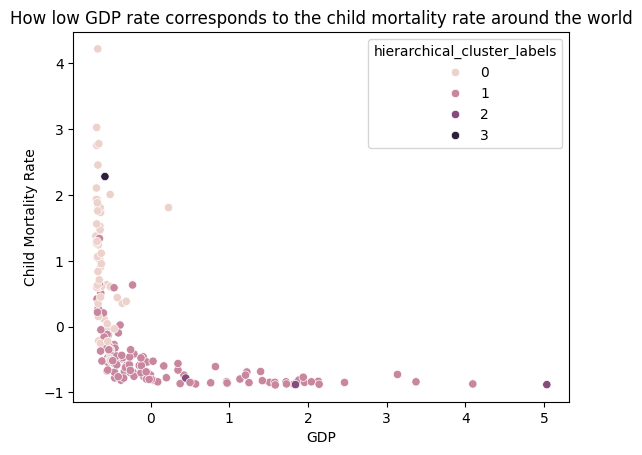

In [11]:
# Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world
sns.scatterplot(x = country_data_scaled['gdpp'] , y = country_data_scaled['child_mort'], hue = country_data_scaled.hierarchical_cluster_labels)
plt.xlabel('GDP')
plt.ylabel('Child Mortality Rate')
plt.title('How low GDP rate corresponds to the child mortality rate around the world')
plt.show()

**Problem Statement 2:** Write a Python program that reads the “Credit Card Customer Data.csv”. The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.

Tasks to be performed:
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model
8. Observe Cluster behavior with different columns
9. Print Co-ordinates of all centroids and silhouette scores for the final model

In [12]:
# Get the data
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Credit%20Card%20Customer%20Data.csv

--2024-03-08 16:02:00--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Credit%20Card%20Customer%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15822 (15K) [text/plain]
Saving to: ‘Credit Card Customer Data.csv’

Credit Card Custome 100%[===================>]  15.45K  --.-KB/s    in 0.001s  

2024-03-08 16:02:00 (18.8 MB/s) - ‘Credit Card Customer Data.csv’ saved [15822/15822]



In [13]:
# Load the data
credit_data = pd.read_csv('Credit Card Customer Data.csv')
credit_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [14]:
# Find missing values
credit_data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [15]:
# Drop the unnecessary columns
credit_data = credit_data.drop(['Sl_No', 'Customer Key'], axis = 1)
credit_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


**Univariate Analysis**

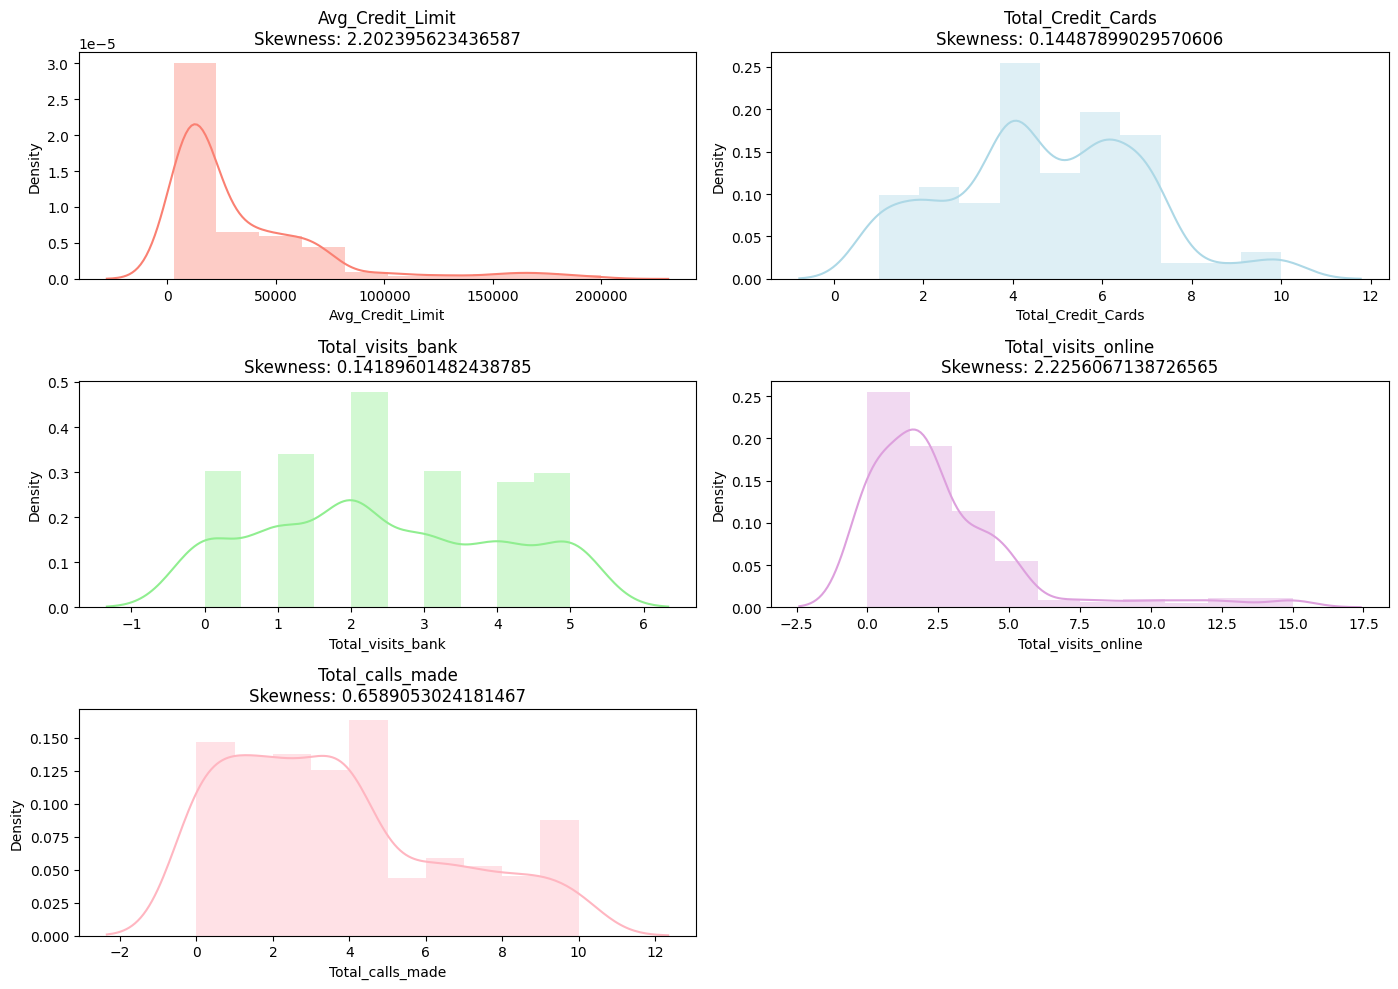

In [16]:
# Loop through columns and plot histogram for each column
plt.figure(figsize = (14, 10))
colors = ['salmon', 'lightblue', 'lightgreen', 'plum', 'lightpink']
for idx, column in enumerate(credit_data.columns):
  plt.subplot(3, 2, idx + 1)
  sns.distplot(credit_data[column], bins=10, color = colors[idx])
  plt.title(f"{column}\nSkewness: {credit_data[column].skew()}")

# Add space between subplots
plt.subplots_adjust(wspace=0.7, hspace=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

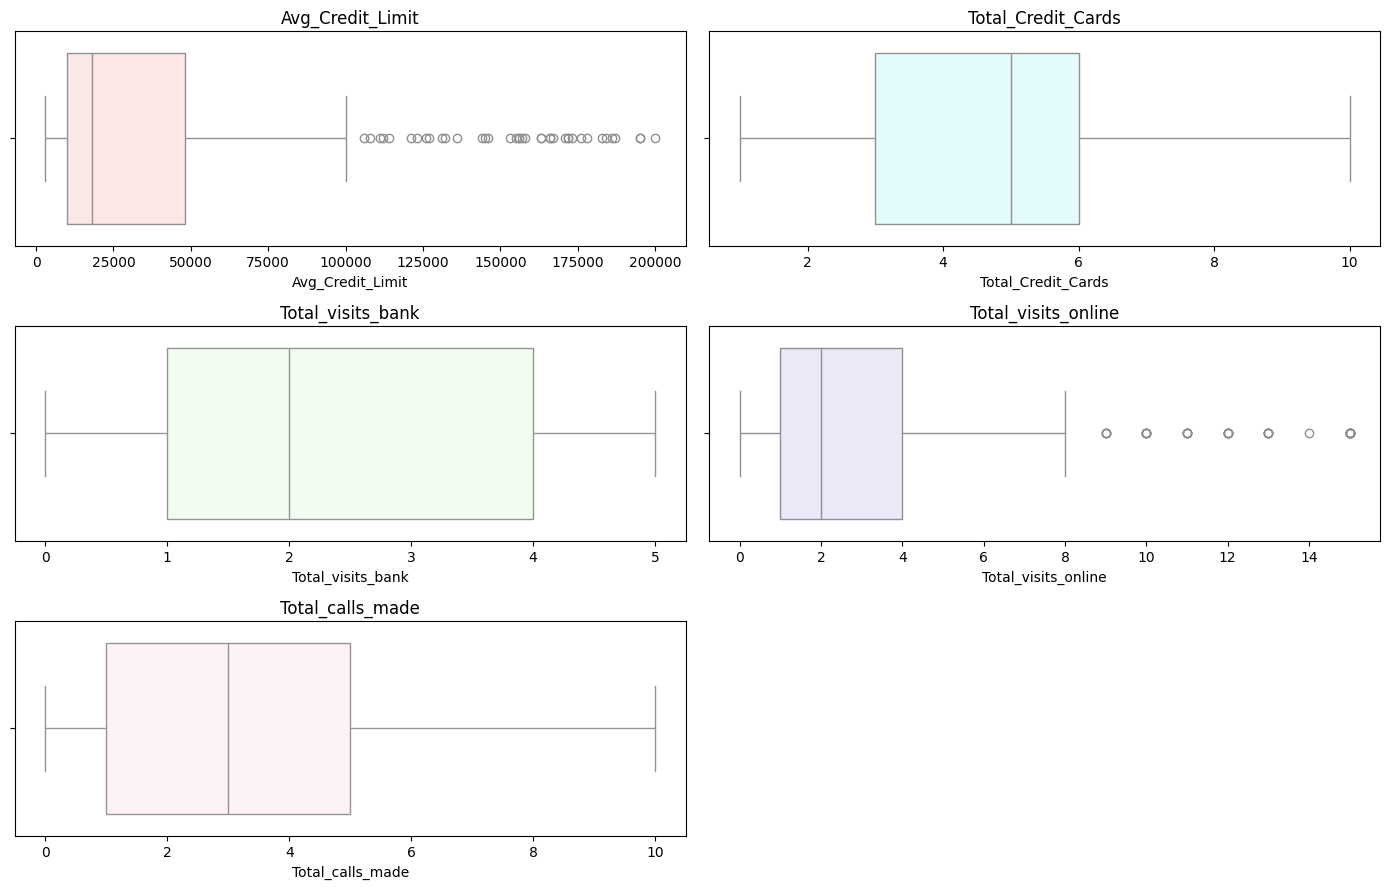

In [17]:
# Loop through columns and plot histogram for each column
plt.figure(figsize = (14, 9))
colors = ['mistyrose', 'lightcyan', 'honeydew', 'lavender', 'lavenderblush']
for idx, column in enumerate(credit_data.columns):
  plt.subplot(3, 2, idx + 1)
  sns.boxplot(x = credit_data[column], color = colors[idx], orient = 'vertical')
  plt.title(column)

# Adjust layout and display
plt.tight_layout()
plt.show()

**Bivariate analysis**


In [18]:
# Scatter plots
credit_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [19]:
# Create a function to plot the scatter plots
def plot_scatter(data, feature1, feature2, color = 'blue', size = None, palette = None, hue = None):
  plt.figure(figsize = (7,5))
  sns.scatterplot(x = data[feature1],
                  y = data[feature2],
                  c = color,
                  size = size,
                  palette = palette,
                  hue = hue)
  plt.title(f'{feature1} Vs. {feature2}')
  plt.show()

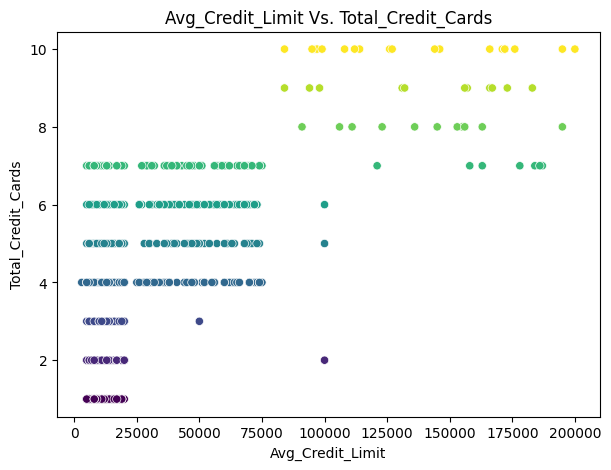

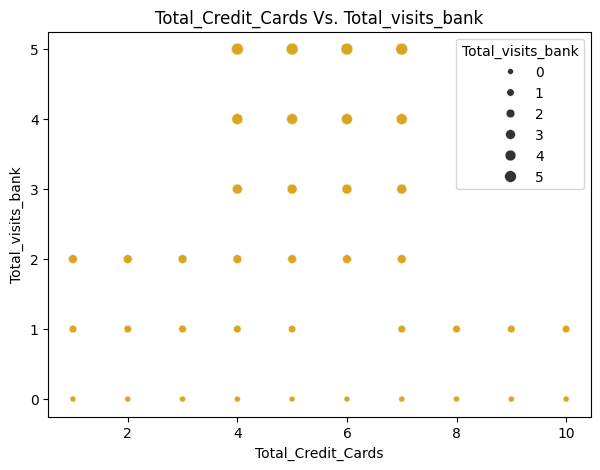

In [20]:
# Average credit limit vs. Total credit cards
plot_scatter(data = credit_data,
             feature1 = 'Avg_Credit_Limit',
             feature2 = 'Total_Credit_Cards',
             color = credit_data['Total_Credit_Cards'])

# Total credit cards vs. total bank visits
plot_scatter(data = credit_data,
             feature2 = 'Total_visits_bank',
             feature1 = 'Total_Credit_Cards',
             color = 'goldenrod',
             size = credit_data['Total_visits_bank'])

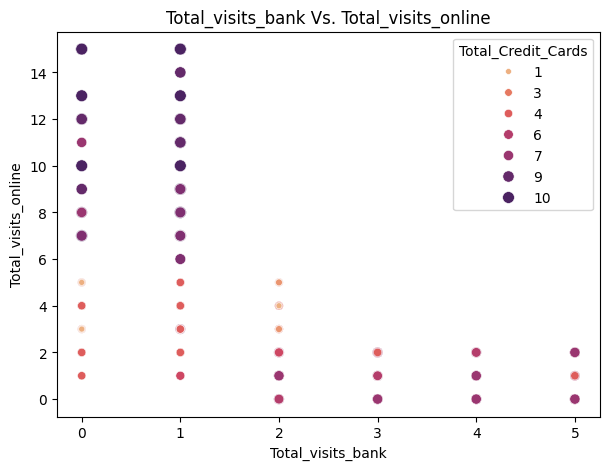

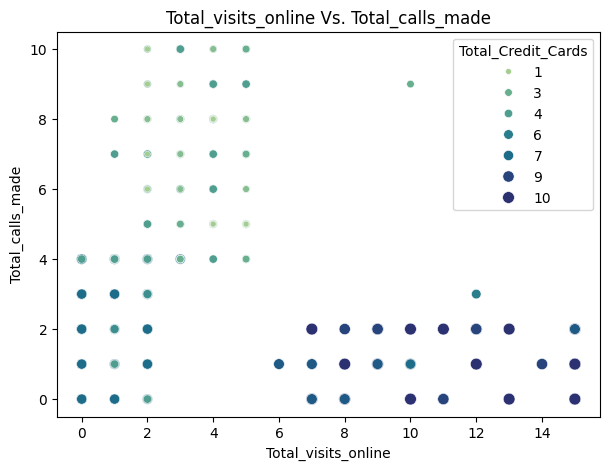

In [21]:
# Total bank visits Vs. Total visits online
plot_scatter(data = credit_data,
             feature1 = 'Total_visits_bank',
             feature2 = 'Total_visits_online',
             hue = credit_data['Total_Credit_Cards'] ,
             size = credit_data['Total_Credit_Cards'],
             palette = 'flare')

# Total bank visits Vs. Total visits online
plot_scatter(data = credit_data,
             feature1 = 'Total_visits_online',
             feature2 = 'Total_calls_made',
             hue = credit_data['Total_Credit_Cards'],
             size = credit_data['Total_Credit_Cards'],
             palette = 'crest')


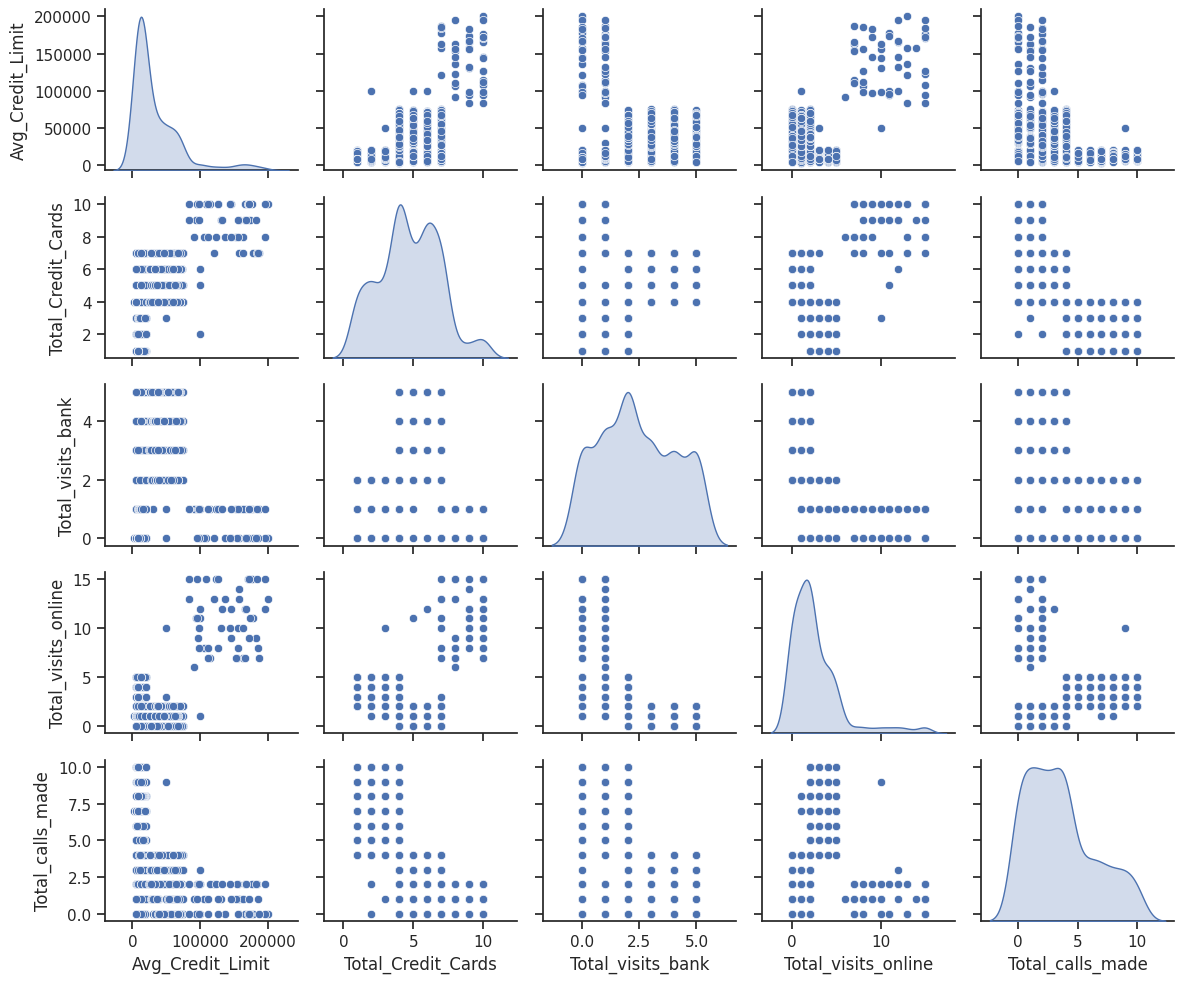

In [22]:
# pairplot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(credit_data, diag_kind='kde', markers='o')

# Adjust layout and display
g.fig.set_size_inches(12, 10)  # Adjust figure size
plt.tight_layout()
plt.show()

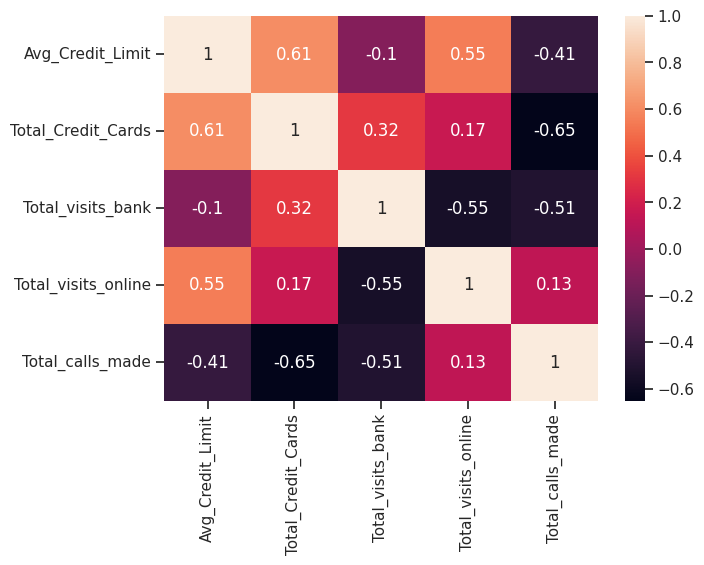

In [23]:
# Heat map
plt.figure(figsize = (7,5))
sns.heatmap(credit_data.corr(), annot = True)
plt.show()

In [24]:
# Standardize the whole dataset
scaler = StandardScaler()
scaler.fit(credit_data)
credit_df = pd.DataFrame(scaler.transform(credit_data),
                         columns = credit_data.columns)
credit_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [25]:
# Find the within-cluster sum of square
wcss = []
silhouette_scores = []

# Create the model for several number of clusters
for k in range(2, 13):

  # Initiate and fit the KMeans model on the data
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(credit_df)

  # Find the Within clusters sum of squares
  wcss.append(kmeans.inertia_)

  # Predict the cluster labels
  cluster_label = kmeans.predict(credit_df)

  # Find the silhouette score with the predicted cluster
  silhouette_avg = silhouette_score(credit_df, cluster_label)
  silhouette_scores.append(silhouette_avg)

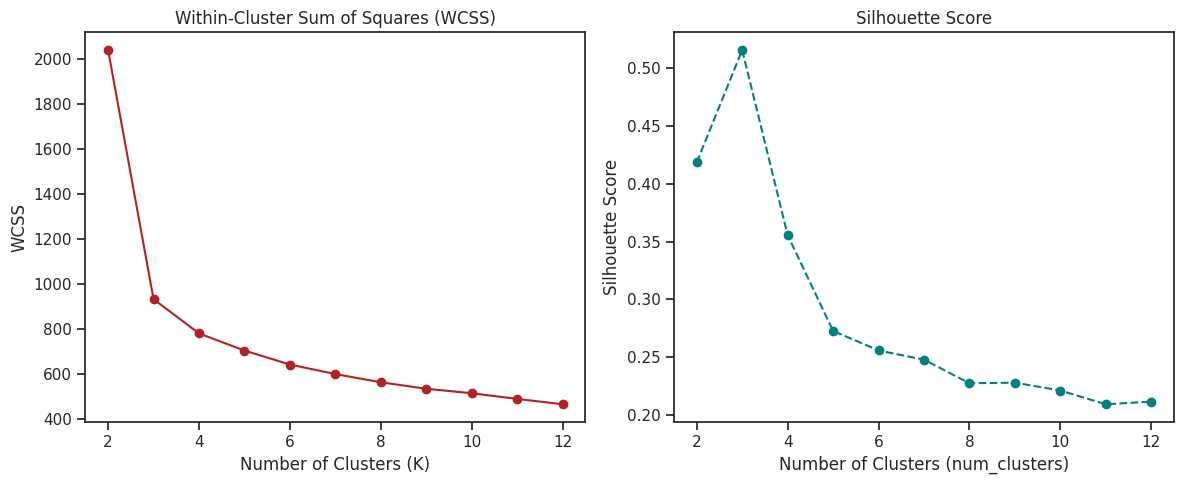

In [26]:
# Use a line plot to find the best size of K
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 13), wcss, marker='o', color = 'firebrick')
plt.title('Within-Cluster Sum of Squares (WCSS)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 13), silhouette_scores, marker='o', linestyle='--', color = 'teal')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (num_clusters)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [27]:
# Optimal k value is among 3 or 4. we selected 3 and creating the final model with selected k Value
best_value_k = 3
np.random.seed(42)
final_kmeans = KMeans(n_clusters=best_value_k)
final_cluster = final_kmeans.fit_predict(credit_df)
credit_df['clusters'] = final_cluster

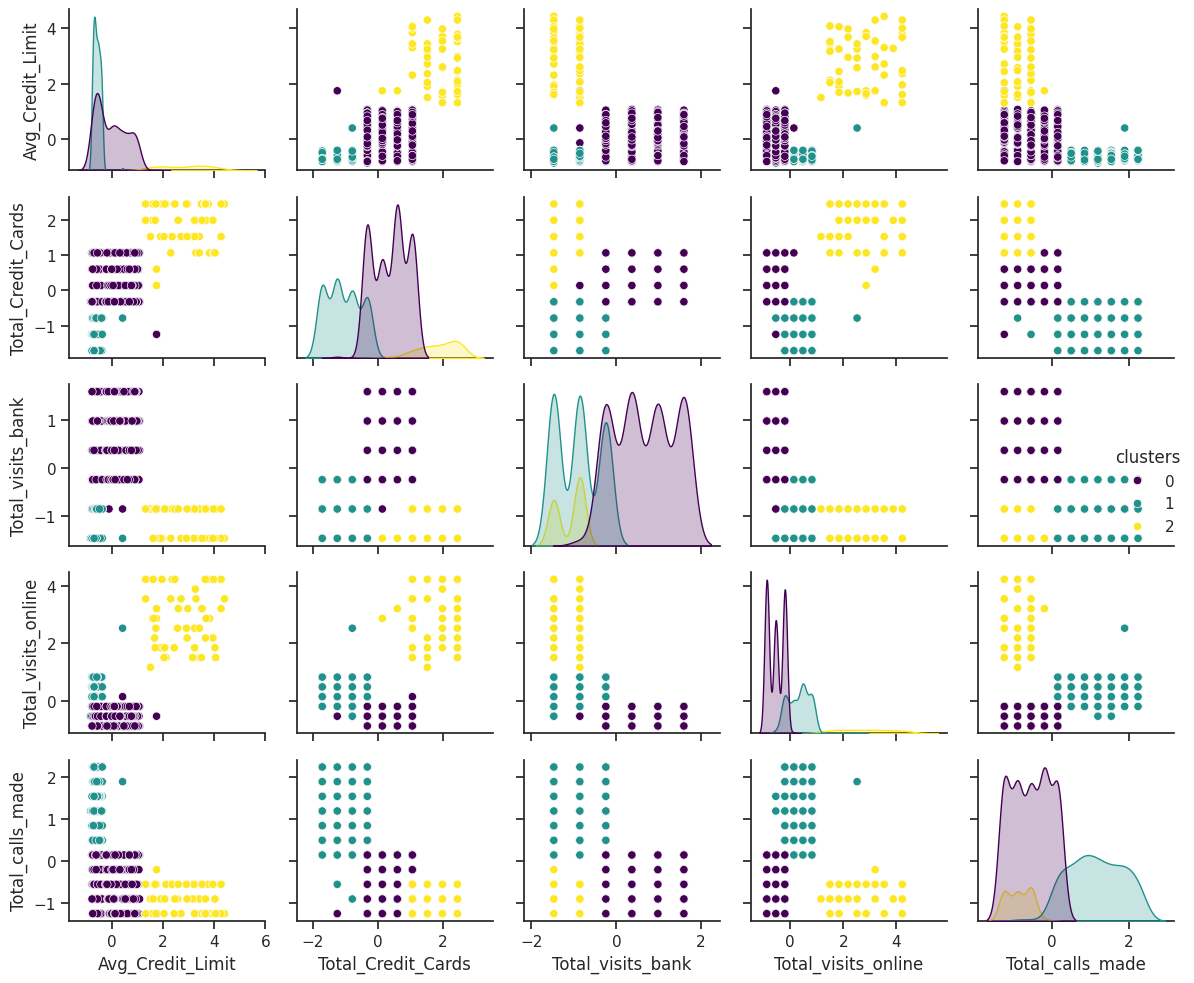

In [28]:
# Plot the pairplot again based on clusters
pairplot = sns.pairplot(credit_df, hue ='clusters', hue_order = 'clusters', palette = 'viridis')
pairplot.fig.set_size_inches(12, 10)  # Adjust figure size
plt.tight_layout()
plt.show()

In [29]:
# Print Co-ordinates of all centroids and silhouette scores for the final model
centroids = final_kmeans.cluster_centers_
silhouette_avg_final = silhouette_score(credit_df, final_cluster)

print("Final Centroids:")
print(centroids)
print(f"\n\nSilhouette Score for the final model: {silhouette_avg_final}")

Final Centroids:
[[-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]
 [-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]]


Silhouette Score for the final model: 0.5411228112448502


**Problem Statement 3:** DBSCAN Clustering Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:

1. Find the correlation among the all the columns and drop the column/s with the least correlation
2. Encode the "Gender" column using get_dummies() function
3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4
4. Print the size of each cluster and also the size of outliers' cluster
5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

In [30]:
# Get the data
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Mall_Customers.csv

--2024-03-08 16:02:50--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3780 (3.7K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.69K  --.-KB/s    in 0s      

2024-03-08 16:02:50 (37.0 MB/s) - ‘Mall_Customers.csv’ saved [3780/3780]



In [31]:
# Load the data
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
# Find the correlation among the all the columns
mall_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [33]:
# Drop the column/s with the least correlation
mall_data.drop('CustomerID', axis = 1, inplace = True)
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [34]:
# Encode the "Gender" column using get_dummies() function
mall_data_encoded = pd.get_dummies(data = mall_data, columns = ['Gender'])
mall_data_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [35]:
# Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4
np.random.seed(42)

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps = 12.5, min_samples = 4)

# Fit and make predictions on the encoded data
dbclusters = dbscan.fit_predict(mall_data_encoded)

In [36]:
# Count the size of each cluster
cluster_sizes = pd.Series(dbclusters).value_counts()

# Count the number of outliers (cluster -1)
outliers_size = cluster_sizes[-1] if -1 in cluster_sizes.index else 0

# Print the size of each cluster and outliers' cluster
print("Cluster sizes:")
print(cluster_sizes)
print("\nSize of outliers' cluster:", outliers_size)

Cluster sizes:
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
dtype: int64

Size of outliers' cluster: 18


In [37]:
# Filter out data points that are not outliers
cluster_wo_outliers = dbclusters[dbclusters != -1]
filtered_dbclusters = mall_data_encoded[dbclusters != -1]
filtered_dbclusters

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
3,23,16,77,1,0
4,31,17,40,1,0
5,22,17,76,1,0
...,...,...,...,...,...
186,54,101,24,1,0
188,41,103,17,1,0
189,36,103,85,1,0
190,34,103,23,1,0


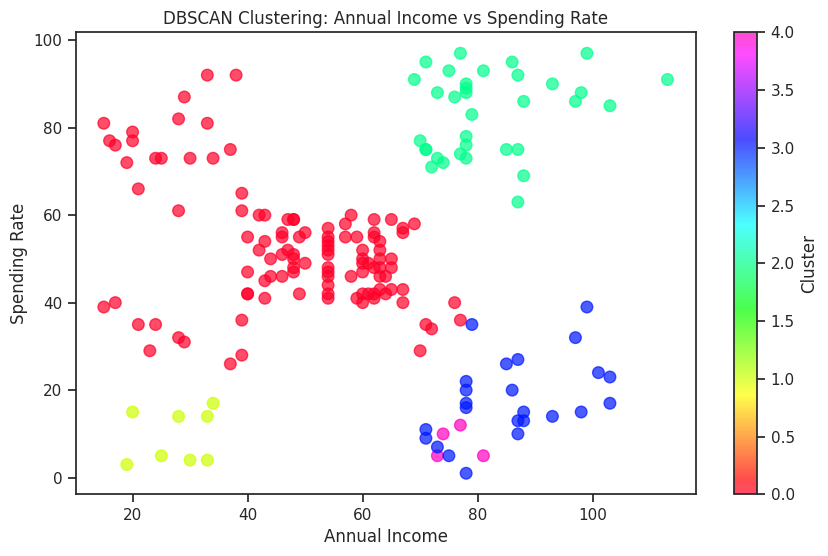

In [38]:
# Scatter plot of annual income vs spending rate
plt.figure(figsize=(10, 6))
plt.scatter(filtered_dbclusters['Annual Income (k$)'],
            filtered_dbclusters['Spending Score (1-100)'],
            s = 70,
            c = cluster_wo_outliers,
            cmap='gist_rainbow',
            alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Spending Rate')
plt.title('DBSCAN Clustering: Annual Income vs Spending Rate')
plt.colorbar(label='Cluster')
plt.show()


**Problem Statement 4:** Write a Python program that reads the Groceries data.csv file into a DataFrame. The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items. Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc.

Tasks to be performed:
1. Install mlxtend library for further process
2. Load the Groceries data.csv data into a Data frame
3. Print customer data where the member number is 1001
4. Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)
5. Drop unnecessary columns like "month","day","year","day_of_week"
6. Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.
7. Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%
8. Generating the rules with their corresponding support, confidence, and lift
9. Filtering out the values with lift > = 1 and confidence > = 0.5

In [39]:
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Groceries%20data.csv

--2024-03-08 16:02:51--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/5_Unsupervised_Machine_Learning/Datasets/Groceries%20data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1527814 (1.5M) [text/plain]
Saving to: ‘Groceries data.csv’

Groceries data.csv  100%[===================>]   1.46M  --.-KB/s    in 0.01s   

2024-03-08 16:02:51 (129 MB/s) - ‘Groceries data.csv’ saved [1527814/1527814]



In [40]:
# Load the data
grocery_data = pd.read_csv('Groceries data.csv')
grocery_data.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [41]:
grocery_data.columns


Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [42]:
# Print customer data where the member number is 1001
grocery_data[grocery_data['Member_number'] == 1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


In [43]:
# Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)
grocery_data['item count'] = 1
grocery_data.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,item count
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1
4,3037,2015-01-02,whole milk,2015,1,2,4,1


In [44]:
# Drop unnecessary columns like "month","day","year","day_of_week"
grocery_data = grocery_data.drop(['month','day','year', 'day_of_week'], axis = 1)
grocery_data.head()

,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1


In [45]:
# Create a new data frame where all data is grouped by member id and items they bought and set their value as item count
grouped_data = grocery_data.groupby(['Member_number', 'itemDescription']).size().reset_index(name='item count')
grouped_data

,Member_number,itemDescription,item count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [46]:
# Pivot the DataFrame to have item names as columns and frequency as values
pivot_table = pd.pivot_table(grouped_data, index='Member_number', columns='itemDescription', values='item count', fill_value=0)

# Replace non-zero values with 1 in the pivot table
pivot_table_binary = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

pivot_table_binary

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from mlxtend.frequent_patterns import association_rules, apriori

# Use Apriori algorithm to generate frequent itemsets with at least 7% support
frequent_itemsets = apriori(pivot_table_binary, min_support=0.07, use_colnames=True)

# Generate rules with corresponding support, confidence, and lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filter out rules with lift >= 1 and confidence >= 0.5
filtered_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
11,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
18,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766,0.152421
21,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775,0.133115
